In [1]:
#does including more rest improve model performance 
#since all the othertasks have such a small amount of 
#time compared to rest

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
import numpy as np
import os
import sys
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
import itertools
#import other python scripts for further anlaysis
import reshape
import plotFW
import results
# Initialization of directory information:
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
dataDir = thisDir + 'data/mvpa_data/'
outDir = thisDir + 'output/mLdoubleRest/'
# Subjects and tasks
taskList=['mixed', 'motor','mem']
subList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']
#all possible combinations of subs and tasks
subsComb=(list(itertools.permutations(subList, 2)))
tasksComb=(list(itertools.permutations(taskList, 2)))
#DS combination
DSvars=list(itertools.product(list(subsComb),list(taskList)))
##SS combination
SSvars=list(itertools.product(list(subList),list(tasksComb)))
#BS combination
BSvars=list(itertools.product(list(subsComb),list(tasksComb)))


def classifySS(classifier,analysis, FW, stats):
    acc_scores_per_task=[]
    tmp_df=pd.DataFrame(SSvars, columns=['sub','task'])
    dfSS=pd.DataFrame()
    dfSS[['train_task','test_task']]=pd.DataFrame(tmp_df['task'].tolist())
    dfSS['sub']=tmp_df['sub']
    for index, row in dfSS.iterrows():
        score=model(classifier, analysis,FW, train_sub=row['sub'], test_sub=row['sub'], train_task=row['train_task'], test_task=row['test_task'])
        acc_scores_per_task.append(score)
    dfSS['acc']=acc_scores_per_task
    if stats is True:
        results.plotACC(dfSS, classifier, analysis)
        results.statsACC(dfSS, classifier, analysis)
        results.boxACC(dfSS, classifier, analysis)
    else:
        print('skipping stats')
    #save accuracy
    dfSS.to_csv(outDir+'results/'+classifier+'/acc/'+analysis+'/acc.csv', index=False)
    
def model(classifier, analysis,FW, train_sub, test_sub, train_task, test_task):
    if classifier=='SVC':
        clf=LinearSVC()
    elif classifier=='logReg':
        clf=LogisticRegression(solver = 'lbfgs')
    elif classifier=='ridge':
        clf=RidgeClassifier()
    else:
        print('Error: You didnt specify what classifier')
    taskFC=reshape.matFiles(dataDir+train_task+'/'+train_sub+'_parcel_corrmat.mat')
    restFC=reshape.matFiles(dataDir+'rest/corrmats_timesplit/half/'+train_sub+'_parcel_corrmat.mat')
    #20 rest sessions split into 10 for train 10 for test
    train_restFC, test_restFC = train_test_split(restFC, test_size=.5)
    x_train, y_train=reshape.concateFC(taskFC, train_restFC)
    #if your subs are the same dont include rest...avoid overfitting!!
    if train_sub==test_sub:
        test_taskFC=reshape.matFiles(dataDir+test_task+'/'+test_sub+'_parcel_corrmat.mat')
        x_test, y_test=reshape.concateFC(test_taskFC, test_restFC)
    else:
        test_taskFC=reshape.matFiles(dataDir+test_task+'/'+test_sub+'_parcel_corrmat.mat')
        test_restFC=reshape.matFiles(dataDir+'rest/'+test_sub+'_parcel_corrmat.mat')
        x_test, y_test=reshape.concateFC(test_taskFC, test_restFC)
    clf.fit(x_train,y_train)
    folds=taskFC.shape[0]
    CVscores=cross_val_score(clf,x_train,y_train, cv=folds)
    if FW is True:
        coef=clf.coef_
        plotFW.feature_plots(coef, classifier, analysis, train_task, train_sub)
    else:
        print('skipping feature weights')
    predict=clf.predict(x_test)
    #Get accuracy of model
    ACCscores=clf.score(x_test,y_test)
    return ACCscores

skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


same sub stats
same sub boxplots
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature 

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


same sub stats
same sub boxplots
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature weights
skipping feature 

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


same sub stats
same sub boxplots
Execution time:  217.51115489006042


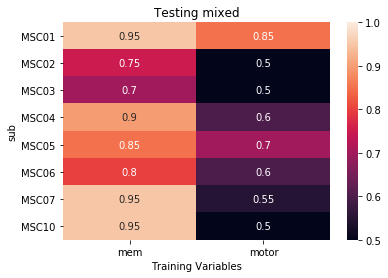

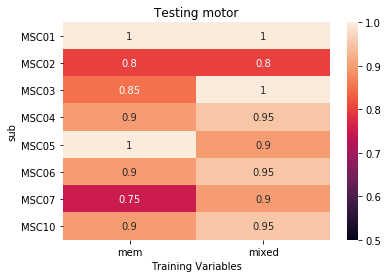

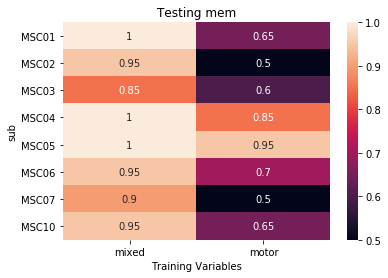

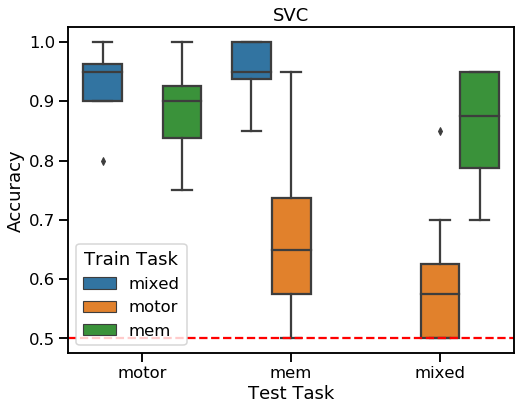

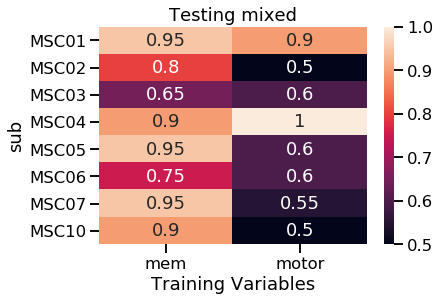

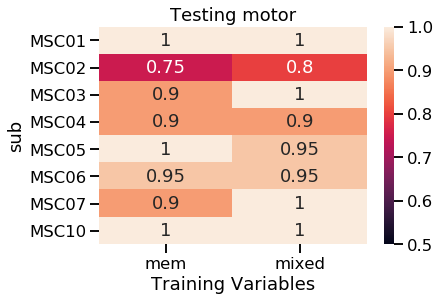

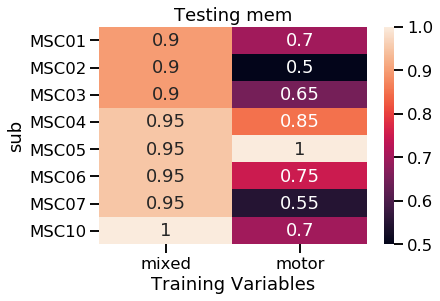

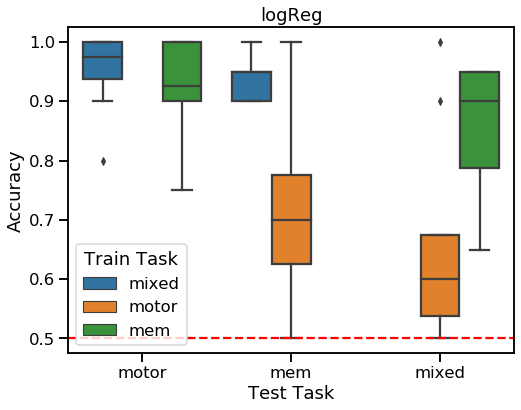

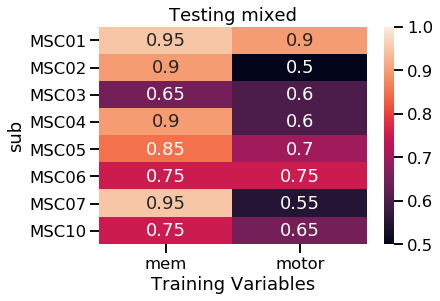

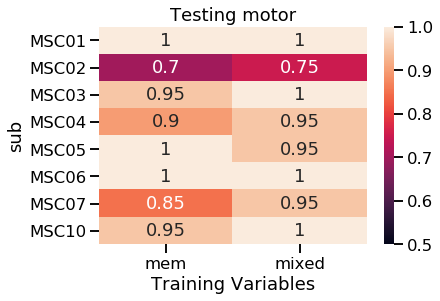

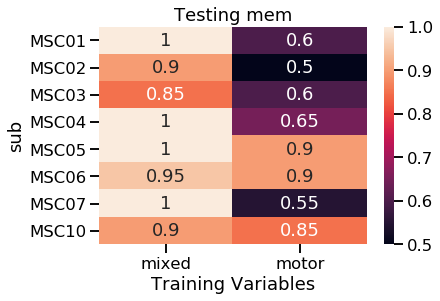

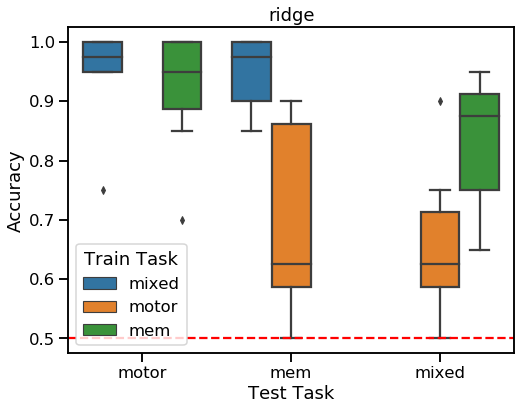

In [2]:
import time
analysisList=['DS', 'SS', 'BS','CV']
classifierList=['SVC', 'logReg','ridge']
start=time.time()
for classifier in classifierList:
    classifySS(classifier, analysis='SS', FW=False, stats=True)
end=time.time()
print("Execution time: ",end-start)

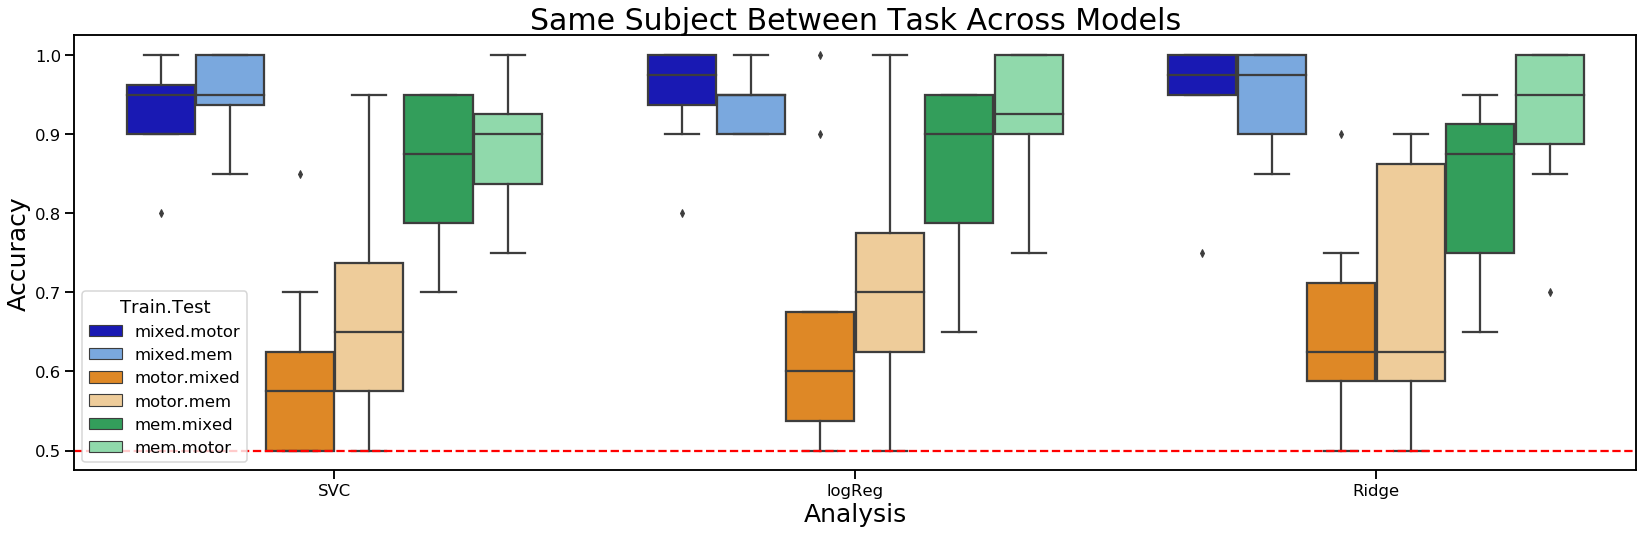

In [3]:
import results
results.ss_boxplot()